# Milestone 6

In this milestone, we implement some of the extensions mentioned in Milestone 5.

## Recall of previous work

Please refer to the [Milestone 4 Report](https://github.com/ML4BD/milestone-4-roguesgallery/blob/master/reports/Milestone%204%20Report.pdf) and the [Milestone 4 Notebook](https://github.com/ML4BD/milestone-4-roguesgallery/blob/master/notebooks/Milestone04/m4_lernnavi_roguesgallery.ipynb) for more details.

---

In Milestone 4, our objective was to predict the level check success of students with respect to their behavior on the **Lernnavi** learning platform. 

To this end, we **pre-processed** the data by removing students identified as inactive using criteria such as least number of actions per week. Then we selected a subset of features for each student and transformed their data into time series.<br>
In an attempt to see if **regularity** helped categorize students into subgroups, we followed the procedure of [Shirvani Boroujeni, et al](https://infoscience.epfl.ch/record/218657/files/) to compute regularity features on online learning time series. We then clustered the students using the regularity metrics.<br>
Finally, we trained multiple time series **classifiers** to predict wether a student would pass a level check or not. One classifier was trained per cluster and one over the whole data. We used 2 different classification techniques.

## Implementations of this milestone

For this milestone, we are planning on taking another approach to solving our research question. Indeed, in the first milestone, we demonstrated the **predictive potential of a user's behavior time series** for its **success in level checks**. For this, we clustered with respect to time-agnostic metrics and then classified the time series.

Our second approach will be to cluster with respect to user time series and then classify using features derived from the markov modeling of users' behaviors.

To this end, we will proceed as follows:

1. Separate math and german-related actions in the data.

2. Cluster the user's behaviors using time series clustering.

3. Apply the markov chain modeling to the sequence of actions for each user.

4. Train a logistic regression on the markov chain representation of the data.


## Data Processing

#### Libraries used

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifier
from sklearn.ensemble import AdaBoostClassifier # Import Ada Boost Classifier

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from sklearn.utils import resample
from sklearn.model_selection import RandomizedSearchCV

from pprint import pprint

In [2]:
seed = 0

#### Data Loading

In [3]:
DATA_DIR = './data'
greyscale = ['#808080', '#929591']

In [4]:
df = pd.read_csv('{}/behavioural_features.csv.gz'.format(DATA_DIR))
df_math_cluster_0 = pd.read_csv('{}/behavioural_features_math_cluster_id_0.csv.gz'.format(DATA_DIR))
df_math_cluster_1 = pd.read_csv('{}/behavioural_features_math_cluster_id_1.csv.gz'.format(DATA_DIR))
df_german_cluster_0 = pd.read_csv('{}/behavioural_features_german_cluster_id_0.csv.gz'.format(DATA_DIR))
df_german_cluster_1 = pd.read_csv('{}/behavioural_features_german_cluster_id_1.csv.gz'.format(DATA_DIR))

In [5]:
df.head()

,num_actions_per_week,eng_score,FDH,FWH,FWD,num_weeks_on,user_id,week,validated
0,241.000000,1,1.0,1.0,1.0,1,393216,2,1
1,120.500000,1,2.0,2.0,2.0,2,393216,17,0
2,80.333333,1,2.0,2.0,2.0,3,393216,18,1
3,60.250000,1,2.0,2.0,2.0,4,393216,27,0
4,48.200000,1,2.0,2.0,2.0,5,393216,28,1


In [6]:
# Checking fraction of NaN values in each column
def check_NaNs(df):
    for c in df.columns:
        na_count = df[c].isna().sum()
        print(f"Column {c} contains {na_count} ({na_count*100 / df.shape[0]:.2f}%) NaN values.")

In [7]:
check_NaNs(df)

Column num_actions_per_week contains 0 (0.00%) NaN values.
Column eng_score contains 0 (0.00%) NaN values.
Column FDH contains 0 (0.00%) NaN values.
Column FWH contains 0 (0.00%) NaN values.
Column FWD contains 0 (0.00%) NaN values.
Column num_weeks_on contains 0 (0.00%) NaN values.
Column user_id contains 0 (0.00%) NaN values.
Column week contains 0 (0.00%) NaN values.
Column validated contains 0 (0.00%) NaN values.


In [8]:
check_NaNs(df_math_cluster_0)

Column num_actions_per_week contains 0 (0.00%) NaN values.
Column eng_score contains 0 (0.00%) NaN values.
Column FDH contains 0 (0.00%) NaN values.
Column FWH contains 0 (0.00%) NaN values.
Column FWD contains 0 (0.00%) NaN values.
Column num_weeks_on contains 0 (0.00%) NaN values.
Column user_id contains 0 (0.00%) NaN values.
Column week contains 0 (0.00%) NaN values.
Column validated contains 0 (0.00%) NaN values.


In [9]:
check_NaNs(df_math_cluster_1)

Column num_actions_per_week contains 0 (0.00%) NaN values.
Column eng_score contains 0 (0.00%) NaN values.
Column FDH contains 0 (0.00%) NaN values.
Column FWH contains 0 (0.00%) NaN values.
Column FWD contains 0 (0.00%) NaN values.
Column num_weeks_on contains 0 (0.00%) NaN values.
Column user_id contains 0 (0.00%) NaN values.
Column week contains 0 (0.00%) NaN values.
Column validated contains 0 (0.00%) NaN values.


In [10]:
check_NaNs(df_german_cluster_0)

Column num_actions_per_week contains 0 (0.00%) NaN values.
Column eng_score contains 0 (0.00%) NaN values.
Column FDH contains 0 (0.00%) NaN values.
Column FWH contains 0 (0.00%) NaN values.
Column FWD contains 0 (0.00%) NaN values.
Column num_weeks_on contains 0 (0.00%) NaN values.
Column user_id contains 0 (0.00%) NaN values.
Column week contains 0 (0.00%) NaN values.
Column validated contains 0 (0.00%) NaN values.


In [11]:
check_NaNs(df_german_cluster_1)

Column num_actions_per_week contains 0 (0.00%) NaN values.
Column eng_score contains 0 (0.00%) NaN values.
Column FDH contains 0 (0.00%) NaN values.
Column FWH contains 0 (0.00%) NaN values.
Column FWD contains 0 (0.00%) NaN values.
Column num_weeks_on contains 0 (0.00%) NaN values.
Column user_id contains 0 (0.00%) NaN values.
Column week contains 0 (0.00%) NaN values.
Column validated contains 0 (0.00%) NaN values.


#### Feature Selection

Splitting the dataset in features and labels:

In [12]:
X = df.drop(columns = ['user_id', 'validated', 'week', 'num_weeks_on']) # features
users = df.user_id
y = df.validated # labels

In [68]:
X_math_0 = df_math_cluster_0.drop(columns = ['user_id', 'validated']) # features
users_math_0 = df_math_cluster_0.user_id
y_math_0 = df_math_cluster_0.validated # labels

In [69]:
X_math_1 = df_math_cluster_1.drop(columns = ['user_id', 'validated']) # features
users_math_1 = df_math_cluster_1.user_id
y_math_1 = df_math_cluster_1.validated # labels

In [70]:
X_german_0 = df_german_cluster_0.drop(columns = ['user_id', 'validated']) # features
users_german_0 = df_german_cluster_0.user_id
y_german_0 = df_german_cluster_0.validated # labels

In [71]:
X_german_1 = df_german_cluster_1.drop(columns = ['user_id', 'validated']) # features
users_german_1 = df_german_cluster_1.user_id
y_german_1 = df_german_cluster_1.validated # labels

#### Splitting the data between Training and Testing sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed) # 70% training and 30% test

In [73]:
X_train_math_0, X_test_math_0, y_train_math_0, y_test_math_0 = train_test_split(X_math_0, y_math_0, test_size=0.3, random_state=seed) # 70% training and 30% test

In [74]:
X_train_math_1, X_test_math_1, y_train_math_1, y_test_math_1 = train_test_split(X_math_1, y_math_1, test_size=0.3, random_state=seed) # 70% training and 30% test

In [75]:
X_train_german_0, X_test_german_0, y_train_german_0, y_test_german_0 = train_test_split(X_german_0, y_german_0, test_size=0.3, random_state=seed) # 70% training and 30% test

In [76]:
X_train_german_1, X_test_german_1, y_train_german_1, y_test_german_1 = train_test_split(X_german_1, y_german_1, test_size=0.3, random_state=seed) # 70% training and 30% test

#### Correcting class imbalance

In [14]:
def correcting_imbalance(X_train, y_train):
    ## Correcting class imbalance

    # Getting samples indices per class
    classes = [0, 1]
    classes = [[i for i, y in enumerate(y_train) if y==c] for c in classes]
    _lengthes = list(map(len, classes))

    # Computing desired number of samples in each class
    upsampling_ratio = 0.5
    _max, _min = max(_lengthes), min(_lengthes)
    n_samples = int( upsampling_ratio * _max + (1-upsampling_ratio) * _min )

    print(f"Minority class: {_min:,} samples.\nMajority class: {_max:,} samples.")
    print(f"Upsampling by {upsampling_ratio*100:.2f}%, each class contains {n_samples:,} samples.")

    # Resampling to match desired number of samples in each class
    balanced = []
    for c in classes:
        balanced.append(resample(c, random_state=seed, n_samples=n_samples) )

    # Verifying and concatenating all in one array
    assert(all([len(c) == n_samples for c in balanced]))
    balanced = np.concatenate(balanced)

    # Reassigning the samples to balance the training set
    y_train_b = np.array(y_train)[balanced]
    X_train_b = np.array(X_train)[balanced]

    # Verifying that the classes are balanced as expected
    assert(all([len([y for y in y_train_b if y==c]) == n_samples for c in [0, 1]]))
    return X_train_b, y_train_b

Converting the NumPy arrays back to pandas DataFrames:

In [15]:
X_train_b, y_train_b = correcting_imbalance(X_train, y_train)
X_train = pd.DataFrame(X_train_b, columns = ['num_actions_per_week', 'eng_score', 'FDH', 'FWH', 'FWD'])

Minority class: 2,020 samples.
Majority class: 5,769 samples.
Upsampling by 50.00%, each class contains 3,894 samples.


In [79]:
X_train_math_0_b, y_train_math_0_b = correcting_imbalance(X_train_math_0, y_train_math_0)
X_train_math_0 = pd.DataFrame(X_train_math_0_b, columns = ['num_actions_per_week', 'eng_score', 'FDH', 'FWH', 'FWD', 'num_weeks_on', 'week'])

Minority class: 2,994 samples.
Majority class: 7,403 samples.
Upsampling by 50.00%, each class contains 5,198 samples.


In [80]:
X_train_math_1_b, y_train_math_1_b = correcting_imbalance(X_train_math_1, y_train_math_1)
X_train_math_1 = pd.DataFrame(X_train_math_1_b, columns = ['num_actions_per_week', 'eng_score', 'FDH', 'FWH', 'FWD', 'num_weeks_on', 'week'])

Minority class: 3 samples.
Majority class: 6 samples.
Upsampling by 50.00%, each class contains 4 samples.


In [81]:
X_train_german_0_b, y_train_german_0_b = correcting_imbalance(X_train_german_0, y_train_german_0)
X_train_german_0 = pd.DataFrame(X_train_german_0_b, columns = ['num_actions_per_week', 'eng_score', 'FDH', 'FWH', 'FWD', 'num_weeks_on', 'week'])

Minority class: 1,912 samples.
Majority class: 4,815 samples.
Upsampling by 50.00%, each class contains 3,363 samples.


In [82]:
X_train_german_1_b, y_train_german_1_b = correcting_imbalance(X_train_german_1, y_train_german_1)
X_train_german_1 = pd.DataFrame(X_train_german_1_b, columns = ['num_actions_per_week', 'eng_score', 'FDH', 'FWH', 'FWD', 'num_weeks_on', 'week'])

Minority class: 1 samples.
Majority class: 3 samples.
Upsampling by 50.00%, each class contains 2 samples.


## Model Building

#### Utils:

In [16]:
def predict_decision_tree_default(X_train, y_train, X_test):
    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier()

    # Train Decision Tree Classifer
    clf = clf.fit(X_train, y_train)

    # Predict the label for test dataset
    y_pred_decision_tree = clf.predict(X_test)
    
    return y_pred_decision_tree

In [17]:
def predict_random_forest_default(X_train, y_train, X_test):
    # Create a Gaussian Classifier
    clf = RandomForestClassifier(n_estimators=100)

    # Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train, y_train)

    # Predict the label for the test dataset
    y_pred_random_forest = clf.predict(X_test)
    
    return y_pred_random_forest

In [18]:
def predict_adaboost_default(X_train, y_train, X_test):
    # Create Adaboost classifer object
    abc = AdaBoostClassifier(n_estimators=50,
                             learning_rate=1)
    # Train Adaboost Classifer
    model = abc.fit(X_train, y_train)

    # Predict the label for test dataset
    y_pred_ada_boost = model.predict(X_test)
    
    return y_pred_ada_boost

In [19]:
def predict_decision_tree(X_train, y_train, X_test):
    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=80)

    # Train Decision Tree Classifer
    clf = clf.fit(X_train, y_train)

    # Predict the label for test dataset
    y_pred_decision_tree = clf.predict(X_test)
    
    return y_pred_decision_tree

In [20]:
def predict_random_forest(X_train, y_train, X_test):
    # Create a Gaussian Classifier
    clf = RandomForestClassifier(n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=70, bootstrap=False)

    # Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train, y_train)

    # Predict the label for the test dataset
    y_pred_random_forest = clf.predict(X_test)
    
    return y_pred_random_forest

In [21]:
def predict_adaboost(X_train, y_train, X_test):
    # Create Adaboost classifer object
    abc = AdaBoostClassifier(n_estimators=1800, learning_rate=0.7, base_estimator=None)
    
    # Train Adaboost Classifer
    model = abc.fit(X_train, y_train)

    # Predict the label for test dataset
    y_pred_ada_boost = model.predict(X_test)
    
    return y_pred_ada_boost

In [22]:
def _create_labels(params):
    """
    Creates the set of labels for the input param values.
    """
    labels = [str(params[k]) + '\n' for k in params.keys()]
    labels = "".join(labels)
    return labels

In [23]:
def plot_results(results):
    """
    Expects a dict with various params and a score result.
    """

    # Get y and x
    ys = [s for _,s in results]
    xs = [p for p,_ in results]
    xlabels = [_create_labels(p) for p in xs] 

    _adjust = "\n" * len(xs[0].keys())
    xlabels = [_adjust+l if i%2==1 else l for i, l in enumerate(xlabels)]
    
    plt.figure(figsize=(20,5))
    plt.plot(ys)
    plt.grid()
    plt.xticks(ticks=list(range(len(ys))), labels=xlabels)
    plt.show()

### Without clustering:

Building the Decision Tree Model with default parameters:

In [24]:
y_pred_decision_tree = predict_decision_tree_default(X_train, y_train_b, X_test)

Building the Random Forest Model:

In [25]:
y_pred_random_forest = predict_random_forest_default(X_train, y_train_b, X_test)

Building the Adaboost Model:

In [26]:
y_pred_ada_boost = predict_adaboost_default(X_train, y_train_b, X_test)

Building the Decision Tree Model with hyperparameter tunning:

In [94]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed) # 70% training and 30% test
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=seed)

In [95]:
#X_train_b, y_train_b = correcting_imbalance(X_train, y_train)
#X_train = pd.DataFrame(X_train_b, columns = ['num_actions_per_week', 'eng_score', 'FDH', 'FWH', 'FWD', 'num_weeks_on', 'week'])

In [27]:
clf = DecisionTreeClassifier()

# Look at the parameters used by default by our current Decision Tree Classifier:
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


In [28]:
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf = DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf, scoring = metrics.make_scorer(metrics.accuracy_score),  param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=seed, n_jobs = -1)# Fit the random search model
clf_random.fit(X_train, y_train_b)

In [107]:
clf_random.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80}

In [108]:
results_decision_tree = clf_random.cv_results_

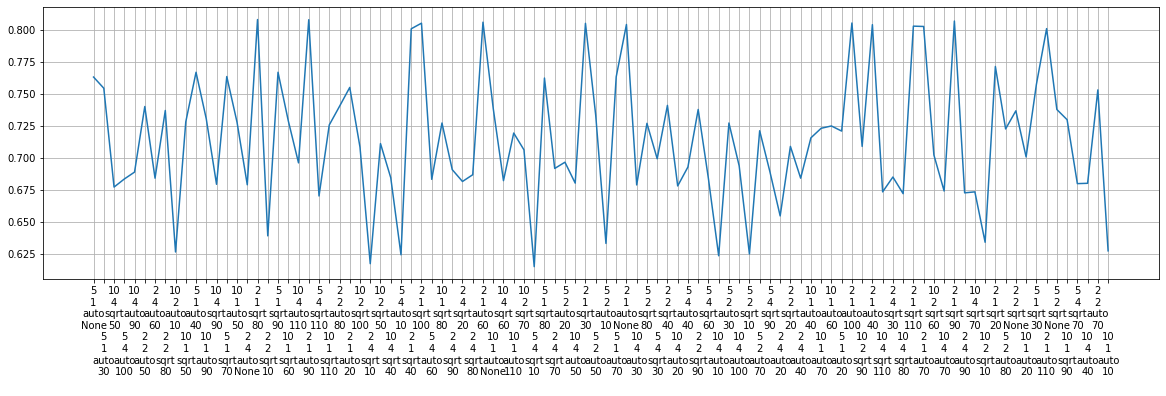

In [109]:
plot_results(list(zip(results_decision_tree['params'], results_decision_tree['mean_test_score'])))

In [38]:
# Create Decision Tree classifer object
clf_decision_tree = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=80)

# Train Decision Tree Classifer
clf_decision_tree = clf_decision_tree.fit(X_train, y_train_b)

# Predict the label for test dataset
y_pred_decision_tree_hyperparameters_tuned = clf_decision_tree.predict(X_test)

In [39]:
feature_imp = pd.DataFrame(zip(clf_decision_tree.feature_importances_, ['num_actions_per_week', 'eng_score', 'FDH', 'FWH', 'FWD', 'num_weeks_on', 'week']))
feature_imp = feature_imp.rename(columns = {0:'importance', 1:'feature'})
feature_imp

,importance,feature
0,0.576180,num_actions_per_week
1,0.016636,eng_score
2,0.133433,FDH
3,0.181472,FWH
4,0.092278,FWD


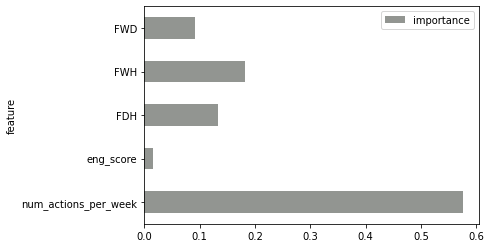

In [40]:
ax = feature_imp.plot.barh(x='feature', y='importance', rot=0, color=greyscale[1])
ax.get_figure().savefig('feature_importance_dc_2.jpg')

Building the Random Forest Model with hyperparameter tunning:

In [33]:
clf = RandomForestClassifier(random_state=seed)

# Look at the parameters used by default by our current Random Forest Classifier:
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [34]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [212]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=10, scoring = metrics.make_scorer(metrics.accuracy_score), random_state=seed, n_jobs = -1)# Fit the random search model
clf_random.fit(X_train, y_train_b)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 2/3; 5/100] START bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400
[CV 2/3; 5/100] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.806 total time= 4.0min
[CV 2/3; 9/100] START bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 2/3; 9/100] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.773 total time= 1.1min
[CV 3/3; 10/100] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600
[CV 3/3; 10/100] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600;, score=0.669 total time= 3.0min
[CV 1/3; 13/100] START bootstrap=True, max_depth=50, max_fea

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, scoring=make_scorer(accuracy_score),
                   verbose=10)

In [213]:
clf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': False}

In [214]:
results_random_forest = clf_random.cv_results_

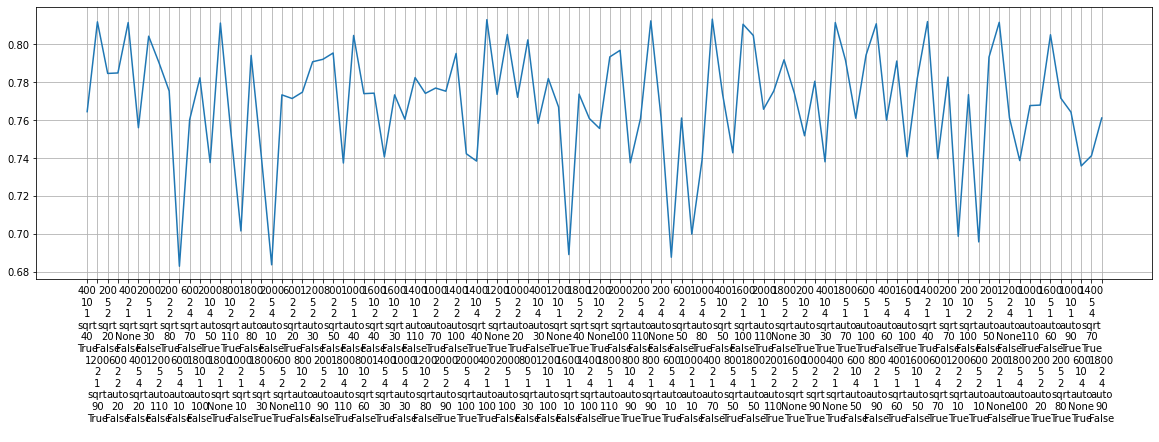

[CV 2/3; 2/100] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200
[CV 2/3; 2/100] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200;, score=0.809 total time=18.0min
[CV 1/3; 15/100] START bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800
[CV 1/3; 15/100] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=0.765 total time= 2.6min
[CV 2/3; 17/100] START bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800
[CV 2/3; 17/100] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800;, score=0.790 total time=22.2min
[CV 3/3; 31/100] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_es

In [215]:
plot_results(list(zip(results_random_forest['params'], results_random_forest['mean_test_score'])))

In [41]:
# Create a Gaussian Classifier
clf_random_forest = RandomForestClassifier(n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=70, bootstrap=False)

# Train the model using the training sets y_pred=clf.predict(X_test)
clf_random_forest.fit(X_train, y_train_b)

# Predict the label for the test dataset
y_pred_random_forest_hyperparameters_tuned = clf_random_forest.predict(X_test)
feature_imp = pd.DataFrame(zip(clf_random_forest.feature_importances_, ['num_actions_per_week', 'eng_score', 'FDH', 'FWH', 'FWD', 'num_weeks_on', 'week']))
feature_imp = feature_imp.rename(columns = {0:'importance', 1:'feature'})
feature_imp

,importance,feature
0,0.603528,num_actions_per_week
1,0.019853,eng_score
2,0.136975,FDH
3,0.149250,FWH
4,0.090393,FWD


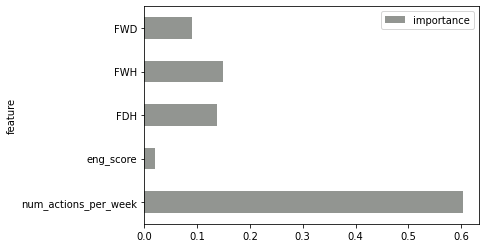

In [42]:
ax = feature_imp.plot.barh(x='feature', y='importance', rot=0, color=greyscale[1])
ax.get_figure().savefig('feature_importance_rf_2.jpg')

Building the AdaBoost Model with hyperparameter tunning:

In [39]:
clf = AdaBoostClassifier()

# Look at the parameters used by default by our current Decision Tree Classifier:
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}


In [40]:
# Number of estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Learning rate
learning = [x for x in np.linspace(0, 1, num = 11)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning}
pprint(random_grid)

{'learning_rate': [0.0,
                   0.1,
                   0.2,
                   0.30000000000000004,
                   0.4,
                   0.5,
                   0.6000000000000001,
                   0.7000000000000001,
                   0.8,
                   0.9,
                   1.0],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf = AdaBoostClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, scoring = metrics.make_scorer(metrics.accuracy_score), n_iter = 100, cv = 3, verbose=2, random_state=seed, n_jobs = -1)# Fit the random search model
clf_random.fit(X_train, y_train_b)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [45]:
clf_random.best_params_

{'n_estimators': 1200, 'learning_rate': 0.8}

In [46]:
results_adaboost = clf_random.cv_results_

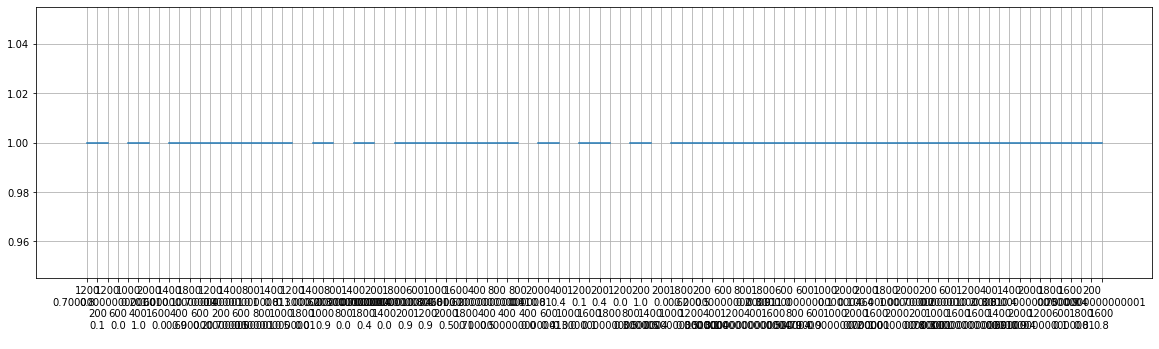

In [47]:
plot_results(list(zip(results_adaboost['params'], results_adaboost['mean_test_score'])))

In [48]:
# Create Adaboost classifer object
abc = AdaBoostClassifier(n_estimators=1200, learning_rate=0.8, base_estimator=None)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train_b)

# Predict the label for test dataset
y_pred_ada_boost_hyperparameters_tuned = model.predict(X_test)

### With clustering:

Computing the models for the math clusters:

In [ ]:
# MATH cluster 0
y_pred_decision_tree_math_0 = predict_decision_tree(X_train_math_0, y_train_math_0_b, X_test_math_0)
y_pred_random_forest_math_0 = predict_random_forest(X_train_math_0, y_train_math_0_b, X_test_math_0)
y_pred_ada_boost_math_0 = predict_adaboost(X_train_math_0, y_train_math_0_b, X_test_math_0)

In [ ]:
# MATH cluster 1
y_pred_decision_tree_math_1 = predict_decision_tree(X_train_math_1, y_train_math_1_b, X_test_math_1)
y_pred_random_forest_math_1 = predict_random_forest(X_train_math_1, y_train_math_1_b, X_test_math_1)
y_pred_ada_boost_math_1 = predict_adaboost(X_train_math_1, y_train_math_1_b, X_test_math_1)

Computing the models for the german clusters:

In [ ]:
# GERMAN cluster 0
y_pred_decision_tree_german_0 = predict_decision_tree(X_train_german_0, y_train_german_0_b, X_test_german_0)
y_pred_random_forest_german_0 = predict_random_forest(X_train_german_0, y_train_german_0_b, X_test_german_0)
y_pred_ada_boost_german_0 = predict_adaboost(X_train_german_0, y_train_german_0_b, X_test_german_0)

In [ ]:
# GERMAN cluster 1
y_pred_decision_tree_german_1 = predict_decision_tree(X_train_german_1, y_train_german_1_b, X_test_german_1)
y_pred_random_forest_german_1 = predict_random_forest(X_train_german_1, y_train_german_1_b, X_test_german_1)
y_pred_ada_boost_german_1 = predict_adaboost(X_train_german_1, y_train_german_1_b, X_test_german_1)

## Model Evaluation

Calculating model accuracy score:

In [43]:
print("Accuracy with the Decision Tree Classifier:", metrics.accuracy_score(y_test, y_pred_decision_tree))

Accuracy with the Decision Tree Classifier: 0.6448038334830788


In [44]:
print("Accuracy with the Decision Tree Classifier (with hyperparameters tuned):", metrics.accuracy_score(y_test, y_pred_decision_tree_hyperparameters_tuned))

Accuracy with the Decision Tree Classifier (with hyperparameters tuned): 0.6292303084755915


In [45]:
print("Accuracy with the Random Forest Classifier:", metrics.accuracy_score(y_test, y_pred_random_forest))

Accuracy with the Random Forest Classifier: 0.6469002695417789


In [46]:
print("Accuracy with the Random Forest Classifier (with hyperparameters tuned):", metrics.accuracy_score(y_test, y_pred_random_forest_hyperparameters_tuned))

Accuracy with the Random Forest Classifier (with hyperparameters tuned): 0.6516921233902366


In [47]:
print("Accuracy with the Ada Boost Classifier:", metrics.accuracy_score(y_test, y_pred_ada_boost))

Accuracy with the Ada Boost Classifier: 0.6271338724168913


In [48]:
print("Accuracy with the Ada Boost Classifier (with hyperparameters tuned):", metrics.accuracy_score(y_test, y_pred_ada_boost_hyperparameters_tuned))

NameError: name 'y_pred_ada_boost_hyperparameters_tuned' is not defined

Calculating accuracy score cluster math 0:

In [ ]:
print("Accuracy with the Decision Tree Classifier Cluster Math 0:", metrics.accuracy_score(y_test_math_0, y_pred_decision_tree_math_0))

In [ ]:
print("Accuracy with the Random Forest Classifier Cluster Math 0:", metrics.accuracy_score(y_test_math_0, y_pred_random_forest_math_0))

In [ ]:
print("Accuracy with the Ada Boost Classifier Cluster Math 0:", metrics.accuracy_score(y_test_math_0, y_pred_ada_boost_math_0))

Calculating accuracy score cluster math 1:

In [ ]:
print("Accuracy with the Decision Tree Classifier Cluster Math 1:", metrics.accuracy_score(y_test_math_1, y_pred_decision_tree_math_1))

In [ ]:
print("Accuracy with the Random Forest Classifier Cluster Math 1:", metrics.accuracy_score(y_test_math_1, y_pred_random_forest_math_1))

In [ ]:
print("Accuracy with the Ada Boost Classifier Cluster Math 0:", metrics.accuracy_score(y_test_math_0, y_pred_ada_boost_math_0))

Calculating accuracy score cluster german 0:

In [ ]:
print("Accuracy with the Decision Tree Classifier Cluster German 0:", metrics.accuracy_score(y_test_german_0, y_pred_decision_tree_german_0))

In [ ]:
print("Accuracy with the Random Forest Classifier Cluster German 0:", metrics.accuracy_score(y_test_german_0, y_pred_random_forest_german_0))

In [ ]:
print("Accuracy with the Ada Boost Classifier Cluster German 0:", metrics.accuracy_score(y_test_german_0, y_pred_ada_boost_german_0))

Calculating accuracy score cluster german 1:

In [ ]:
print("Accuracy with the Decision Tree Classifier Cluster German 1:", metrics.accuracy_score(y_test_german_1, y_pred_decision_tree_german_1))

In [ ]:
print("Accuracy with the Random Forest Classifier Cluster German 1:", metrics.accuracy_score(y_test_german_1, y_pred_random_forest_german_1))

In [ ]:
print("Accuracy with the Ada Boost Classifier Cluster German 1:", metrics.accuracy_score(y_test_german_1, y_pred_ada_boost_german_1))

#### Utils:

In [49]:
def get_metrics_dict(y_true, y_pred, report = True, target_names=['Failed', 'Passed']):
    """
    Prints a classification report and 
    computes the following set of binary classification metrics:
    - 'accuracy'
    - 'balanced_accuracy': accuracy taking class balance into account,
    - 'adjusted_balanced_accuracy' : balanced accuracy accounting for chance in classification
    - 'f1'
    - 'f1_weighted' : F1 score weighted by classes support,
    - 'matthews' : matthews binary classification correlation coefficient.
    """
    scores={}
    
    if report:
        print(metrics.classification_report(y_true, y_pred, target_names=target_names))

    scores['accuracy'] = metrics.accuracy_score(y_true, y_pred)

    scores['balanced_accuracy'] = metrics.balanced_accuracy_score(y_true, y_pred)
    
    scores['adjusted_balanced_accuracy'] = metrics.balanced_accuracy_score(y_true, y_pred, adjusted=True)

    scores['f1'] = metrics.f1_score(y_true, y_pred)

    scores['f1_weighted'] = metrics.f1_score(y_true, y_pred, average='weighted')

    scores['matthews'] = metrics.matthews_corrcoef(y_true, y_pred)
    
    return scores

In [50]:
def analyze_val_scores(results, y_true, title, name):
    """
    Analyzes all the input results across various metrics.
    'results' is expected to be of shape [ (n_samples, y_pred) ].
    """
    print("\n"+title)
    
    n_samples = []
    metrics_dicts = []
    
    # sorting results array
    results = np.array(sorted(results, key=lambda x : x[0]), dtype=object)
    
    # Creating all the metrics
    for _n_samples, y_pred in results:
        _y_true = y_true[:len(y_pred)]
        
        n_samples.append(_n_samples)
        metrics_dicts.append(get_metrics_dict(y_true, y_pred, report=False))
    
    # Plotting F1 & accuracy across samples
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    
    for i, m in enumerate(['f1', 'accuracy']):
        ax = axes[i]
        y = [d[m] for d in metrics_dicts]
        x = n_samples
        
        ax.plot(x, y)
        ax.set_xlabel('Number of samples used to train classifier.')
        ylabel = 'Accuracy' if m=='accuracy' else 'F1-score'
        ax.set_ylabel(ylabel)
    
    plt.savefig(name)
    plt.show()
    
    ## Creating table
    
    # Creating all columns and columns length (min 6, max length of title)
    ms = list(metrics_dicts[0].keys())
    ms = [(m, max(len(m), 6)) for m in ms]
    
    # Printing table's first line
    print()
    print(f"{'':9s}|" + "|".join([ m for m, l in ms ]) )
    
    # For each n_sample, print all metric values
    for _n_samples, d in zip(n_samples, metrics_dicts):
        line = f"{_n_samples:9.0f}|"
        
        _ms = [f"{d[m]:6.3f}" for m, l in ms]
        line = line + "|".join(_ms)
        
        print(line)

In [51]:
# Train a classifier for an increasing number of samples to tackle infeasibility due to quadratic scaling

def training(classifier_type, X_train, y_train, X_test):
    n_samples = np.array([int(x) for x in np.linspace(10, len(y_train))])
    n_samples = [s for s in n_samples if s < 1000]
    print(f"INFO: Going up to {n_samples[-1]} samples.")
    validations = []

    for _n_samples in n_samples:
        print(f"Training with {_n_samples} samples...")

        x, y = resample(X_train, y_train, random_state=seed, n_samples=_n_samples)
        y = np.array(y).ravel()

        if classifier_type == 'decision_tree':
            clf = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=80)
            clf.fit(x, y)
            _validation = clf.predict(X_test)
        elif classifier_type == 'random_forest':
            clf = RandomForestClassifier(n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=70, bootstrap=False)
            clf.fit(x, y)
            _validation = clf.predict(X_test)
        else:
            abc = AdaBoostClassifier(n_estimators=1200, learning_rate=0.8)
            model = abc.fit(x, y)
            _validation = model.predict(X_test)

        validations.append((_n_samples, _validation))
        print(f"Done!")
    return validations

INFO: Going up to 962 samples.
Training with 10 samples...
Done!
Training with 168 samples...
Done!
Training with 327 samples...
Done!
Training with 486 samples...
Done!
Training with 644 samples...
Done!
Training with 803 samples...
Done!
Training with 962 samples...
Done!

Classification using DecisionTreeClassifier (no clustering)


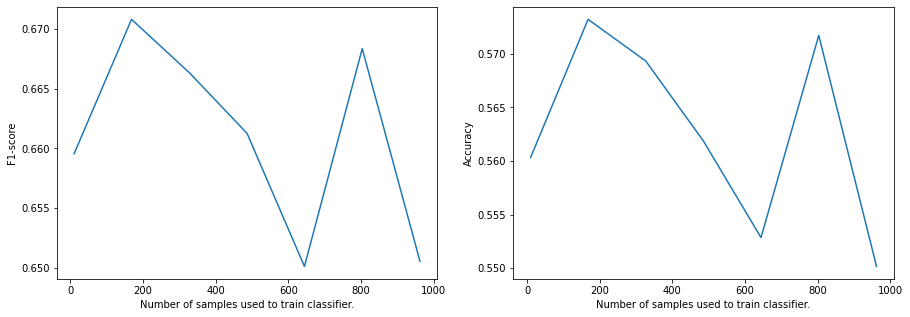


         |accuracy|balanced_accuracy|adjusted_balanced_accuracy|f1|f1_weighted|matthews
       10| 0.560| 0.545| 0.089| 0.660| 0.586| 0.079
      168| 0.573| 0.558| 0.116| 0.671| 0.598| 0.103
      327| 0.569| 0.557| 0.113| 0.666| 0.594| 0.100
      486| 0.562| 0.545| 0.091| 0.661| 0.587| 0.080
      644| 0.553| 0.543| 0.086| 0.650| 0.579| 0.076
      803| 0.572| 0.559| 0.119| 0.668| 0.597| 0.105
      962| 0.550| 0.534| 0.068| 0.651| 0.576| 0.060


In [52]:
validations_decision_tree = training('decision_tree', X_train, y_train_b, X_test)
analyze_val_scores(validations_decision_tree, y_test, "Classification using DecisionTreeClassifier (no clustering)", 'results_dc_2.jpg')

INFO: Going up to 962 samples.
Training with 10 samples...
Done!
Training with 168 samples...
Done!
Training with 327 samples...
Done!
Training with 486 samples...
Done!
Training with 644 samples...
Done!
Training with 803 samples...
Done!
Training with 962 samples...
Done!

Classification using RandomForestClassifier (no clustering)


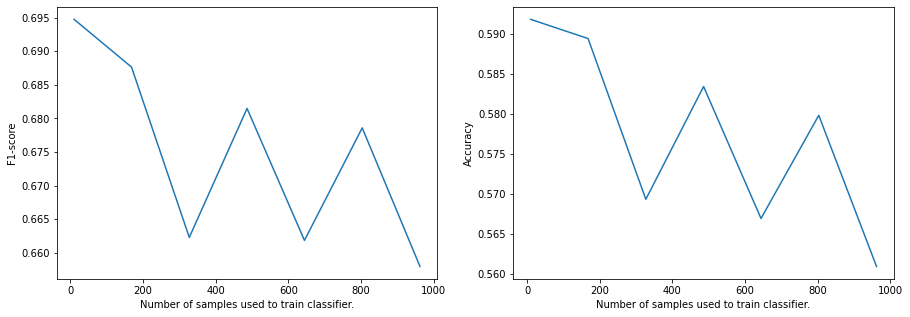


         |accuracy|balanced_accuracy|adjusted_balanced_accuracy|f1|f1_weighted|matthews
       10| 0.592| 0.557| 0.114| 0.695| 0.613| 0.103
      168| 0.589| 0.568| 0.136| 0.688| 0.612| 0.121
      327| 0.569| 0.566| 0.132| 0.662| 0.595| 0.117
      486| 0.583| 0.564| 0.129| 0.681| 0.607| 0.114
      644| 0.567| 0.560| 0.119| 0.662| 0.592| 0.106
      803| 0.580| 0.560| 0.120| 0.679| 0.604| 0.107
      962| 0.561| 0.550| 0.100| 0.658| 0.587| 0.089


In [53]:
validations_random_forest = training('random_forest', X_train, y_train_b, X_test)
analyze_val_scores(validations_random_forest, y_test, "Classification using RandomForestClassifier (no clustering)", 'results_rf_2.jpg')

INFO: Going up to 962 samples.
Training with 10 samples...
Done!
Training with 168 samples...
Done!
Training with 327 samples...
Done!
Training with 486 samples...
Done!
Training with 644 samples...
Done!
Training with 803 samples...
Done!
Training with 962 samples...
Done!

Classification using AdaBoostClassifier (no clustering)


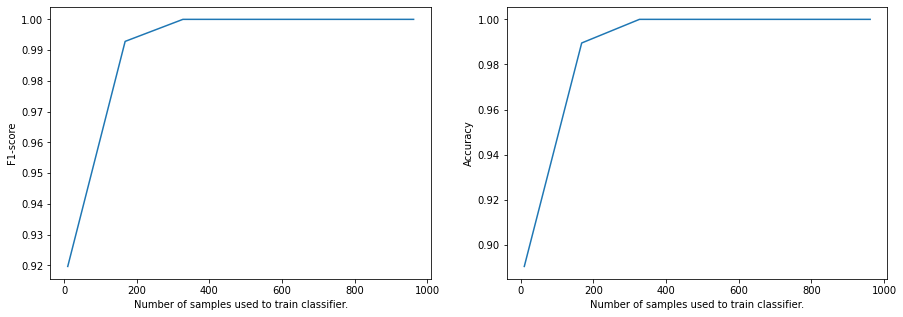


         |accuracy|balanced_accuracy|adjusted_balanced_accuracy|f1|f1_weighted|matthews
       10| 0.890| 0.926| 0.851| 0.920| 0.895| 0.775
      168| 0.990| 0.993| 0.986| 0.993| 0.990| 0.974
      327| 1.000| 1.000| 1.000| 1.000| 1.000| 1.000
      486| 1.000| 1.000| 1.000| 1.000| 1.000| 1.000
      644| 1.000| 1.000| 1.000| 1.000| 1.000| 1.000
      803| 1.000| 1.000| 1.000| 1.000| 1.000| 1.000
      962| 1.000| 1.000| 1.000| 1.000| 1.000| 1.000


In [61]:
validations_adaboost = training('adaboost', X_train, y_train_b, X_test)
analyze_val_scores(validations_adaboost, y_test, "Classification using AdaBoostClassifier (no clustering)")

Cluster math 0:

In [ ]:
validations_decision_tree_math_0 = training('decision_tree', X_train_math_0, y_train_math_0_b, X_test_math_0)
analyze_val_scores(validations_decision_tree_math_0, y_test_math_0, "Classification using DecisionTreeClassifier (cluster math 0)")

In [ ]:
validations_random_forest_math_0 = training('random_forest', X_train_math_0, y_train_math_0_b, X_test_math_0)
analyze_val_scores(validations_random_forest_math_0, y_test_math_0, "Classification using RandomForestClassifier (cluster math 0)")

In [ ]:
validations_adaboost_math_0 = training('adaboost', X_train_math_0, y_train_math_0_b, X_test_math_0)
analyze_val_scores(validations_adaboost_math_0, y_test_math_0, "Classification using AdaBoostClassifier (cluster math 0)")

Cluster math 1:

In [ ]:
validations_decision_tree_math_1 = training('decision_tree', X_train_math_1, y_train_math_1_b, X_test_math_1)
analyze_val_scores(validations_decision_tree_math_1, y_test_math_1, "Classification using DecisionTreeClassifier (cluster math 1)")

In [ ]:
validations_random_forest_math_1 = training('random_forest', X_train_math_1, y_train_math_1_b, X_test_math_1)
analyze_val_scores(validations_random_forest_math_1, y_test_math_1, "Classification using RandomForestClassifier (cluster math 1)")

In [ ]:
validations_adaboost_math_1 = training('adaboost', X_train_math_1, y_train_math_1_b, X_test_math_1)
analyze_val_scores(validations_adaboost_math_1, y_test_math_1, "Classification using AdaBoostClassifier (cluster math 1)")

Cluster german 0:

In [ ]:
validations_decision_tree_german_0 = training('decision_tree', X_train_german_0, y_train_german_0_b, X_test_german_0)
analyze_val_scores(validations_decision_tree_german_0, y_test_german_0, "Classification using DecisionTreeClassifier (cluster german 0)")

In [ ]:
validations_random_forest_german_0 = training('random_forest', X_train_german_0, y_train_german_0_b, X_test_german_0)
analyze_val_scores(validations_random_forest_german_0, y_test_german_0, "Classification using RandomForestClassifier (cluster german 0)")

In [ ]:
validations_adaboost_german_0 = training('adaboost', X_train_german_0, y_train_german_0_b, X_test_german_0)
analyze_val_scores(validations_adaboost_german_0, y_test_german_0, "Classification using AdaBoostClassifier (cluster german 0)")

Cluster german 1:

In [ ]:
validations_decision_tree_german_1 = training('decision_tree', X_train_german_1, y_train_german_1_b, X_test_german_1)
analyze_val_scores(validations_decision_tree_german_1, y_test_german_1, "Classification using DecisionTreeClassifier (cluster german 1)")

In [ ]:
validations_random_forest_german_1 = training('random_forest', X_train_german_1, y_train_german_1_b, X_test_german_1)
analyze_val_scores(validations_random_forest_german_1, y_test_german_1, "Classification using RandomForestClassifier (cluster german 1)")

In [ ]:
validations_adaboost_german_1 = training('adaboost', X_train_german_1, y_train_german_1_b, X_test_german_1)
analyze_val_scores(validations_adaboost_german_1, y_test_german_1, "Classification using AdaBoostClassifier (cluster german 1)")